In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import datetime

pd.set_option('display.max_columns', None)

In [29]:
#!pip3 install plotly

In [30]:
bp_data = pd.read_csv('./BP_Log.csv')
bp_data.tail()

,Date,DoW,BP1,BP2,BP3
319,2024-02-21,Wednesday,NaN,NaN,NaN
320,2024-02-22,Thursday,NaN,NaN,NaN
321,2024-02-23,Friday,NaN,NaN,NaN
322,2024-02-24,Saturday,NaN,NaN,NaN
323,2024-02-25,Sunday,NaN,NaN,NaN


In [39]:
# last 30

bp_data = bp_data[bp_data['Date'] >= '2023-12-01']
bp_data = bp_data[bp_data['BP1'].notna()]
bp_data



,Date,DoW,BP1,BP2,BP3
237,2023-12-01,Friday,123/87 - 81,115/82 - 85,126/88 - 87
238,2023-12-02,Saturday,119/83 - 77,116/83 - 79,119/81 - 79
239,2023-12-03,Sunday,135/84 - 79,136/83 - 87,133/81 - 83
240,2023-12-04,Monday,125/81 - 93,125/81 - 92,132/87 - 84
241,2023-12-05,Tuesday,131/82 - 62,125/86 - 65,124/82 - 69
242,2023-12-06,Wednesday,117/81 - 69,119/82 - 71,133/86 - 69
243,2023-12-07,Thursday,124/83 - 67,128/78 - 65,138/84 - 70
244,2023-12-08,Friday,141/84 - 67,138/84 - 66,124/80 - 75
245,2023-12-09,Saturday,137/79 - 74,109/87 - 78,120/80 - 74
246,2023-12-10,Sunday,117/79 - 74,122/78 - 74,122/85 - 68


In [45]:
df = bp_data.copy()
df = df[df['BP1'].notna()]

df['sys1'] = pd.DataFrame(df['BP1'].str.split('/').to_list(), columns = ['sys', 'delme'])['sys'].astype('float64')
df['sys2'] = pd.DataFrame(df['BP2'].str.split('/').to_list(), columns = ['sys', 'delme'])['sys'].astype('float64')
df['sys3'] = pd.DataFrame(df['BP3'].str.split('/').to_list(), columns = ['sys', 'delme'])['sys'].astype('float64')
df['mn_sys'] = (df['sys1'] + df['sys2'] + df['sys3']) / 3

dia1tmp = pd.DataFrame(df['BP1'].str.split('/').to_list(), columns = ['sys', 'delme'])['delme'].str.split('-').to_list()
df['di1'] = pd.DataFrame(dia1tmp)[0].astype('float64')
dia2tmp = pd.DataFrame(df['BP2'].str.split('/').to_list(), columns = ['sys', 'delme'])['delme'].str.split('-').to_list()
df['di2'] = pd.DataFrame(dia2tmp)[0].astype('float64')
dia3tmp = pd.DataFrame(df['BP3'].str.split('/').to_list(), columns = ['sys', 'delme'])['delme'].str.split('-').to_list()
df['di3'] = pd.DataFrame(dia3tmp)[0].astype('float64')

df['mn_di'] = (df['di1'] + df['di2'] + df['di3']) / 3

df

,Date,DoW,BP1,BP2,BP3,sys1,sys2,sys3,mn_sys,di1,di2,di3,mn_di
237,2023-12-01,Friday,123/87 - 81,115/82 - 85,126/88 - 87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,2023-12-02,Saturday,119/83 - 77,116/83 - 79,119/81 - 79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,2023-12-03,Sunday,135/84 - 79,136/83 - 87,133/81 - 83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,2023-12-04,Monday,125/81 - 93,125/81 - 92,132/87 - 84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,2023-12-05,Tuesday,131/82 - 62,125/86 - 65,124/82 - 69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,2023-12-06,Wednesday,117/81 - 69,119/82 - 71,133/86 - 69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2023-12-07,Thursday,124/83 - 67,128/78 - 65,138/84 - 70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,2023-12-08,Friday,141/84 - 67,138/84 - 66,124/80 - 75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-12-09,Saturday,137/79 - 74,109/87 - 78,120/80 - 74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-12-10,Sunday,117/79 - 74,122/78 - 74,122/85 - 68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 237 to 258
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    22 non-null     object 
 1   DoW     22 non-null     object 
 2   BP1     22 non-null     object 
 3   BP2     22 non-null     object 
 4   BP3     22 non-null     object 
 5   sys1    0 non-null      float64
 6   sys2    0 non-null      float64
 7   sys3    0 non-null      float64
 8   mn_sys  0 non-null      float64
 9   di1     0 non-null      float64
 10  di2     0 non-null      float64
 11  di3     0 non-null      float64
 12  mn_di   0 non-null      float64
dtypes: float64(8), object(5)
memory usage: 2.4+ KB


In [47]:
s1 = df[['Date', 'DoW', 'sys1']]; s2 = df[['Date', 'DoW', 'sys2']]; s3 = df[['Date', 'DoW', 'sys3']]
d1 = df[['Date', 'DoW', 'di1']]; d2 = df[['Date', 'DoW', 'di2']]; d3 = df[['Date', 'DoW', 'di3']]

df_sys = pd.concat([s1,s2,s3], axis=0)
df_dia = pd.concat([d1,d2,d3], axis=0)

df_sys['sys'] = df_sys['sys1'].fillna(df_sys['sys2']).fillna(df_sys['sys3'])
df_dia['dia'] = df_dia['di1'].fillna(df_dia['di2']).fillna(df_dia['di3'])

df_daily = df_sys[['Date', 'DoW', 'sys']].copy()
df_daily['dia'] = df_dia['dia']
df_daily.reset_index(inplace=True)

df_daily

,index,Date,DoW,sys,dia
0,237,2023-12-01,Friday,NaN,NaN
1,238,2023-12-02,Saturday,NaN,NaN
2,239,2023-12-03,Sunday,NaN,NaN
3,240,2023-12-04,Monday,NaN,NaN
4,241,2023-12-05,Tuesday,NaN,NaN
...,...,...,...,...,...
61,254,2023-12-18,Monday,NaN,NaN
62,255,2023-12-19,Tuesday,NaN,NaN
63,256,2023-12-20,Wednesday,NaN,NaN
64,257,2023-12-21,Thursday,NaN,NaN


ValueError: cannot convert float NaN to integer

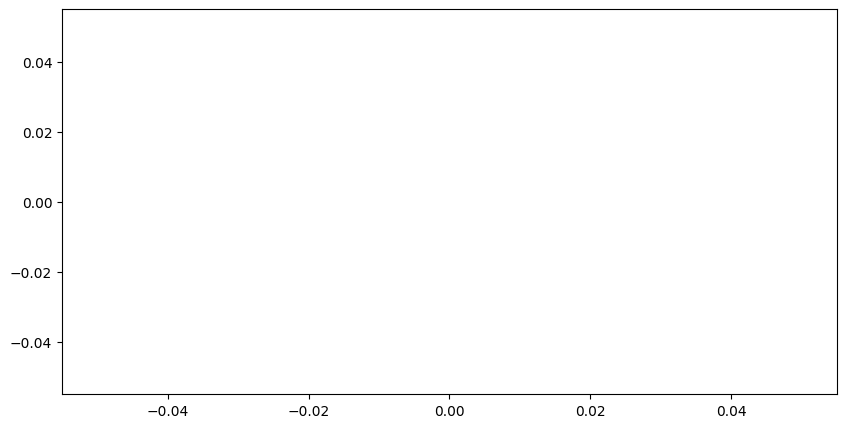

In [48]:
plt.figure(figsize=(10,5))
    
sns.histplot(data=df_daily['sys'], binwidth=1, legend=False)
sns.histplot(data=df_daily['dia'], binwidth=1, legend=False)
# plt.xticks(range(int(min(df_daily['dia']-10)), 171, 10))
plt.xticks(range(70,180,10))
plt.show()

ValueError: cannot convert float NaN to integer

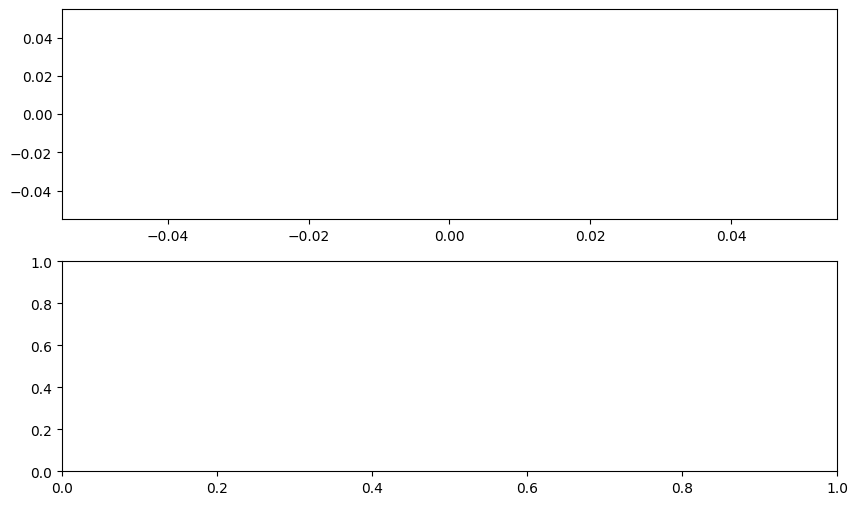

In [49]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# top fig
sns.histplot(data=df_daily['sys'], binwidth=1, legend=False, ax=axs[0], kde=True)
axs[0].set_title(f'Systolic - {df_daily.shape[0]} Tests')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# 2nd fig
sns.histplot(data=df_daily['dia'], binwidth=1, legend=False, ax=axs[1], kde=True)
axs[1].set_title('Diastolic')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
df_daily.shape[0]

747

In [18]:
# Tukey EDA Test...
df_daily[['sys', 'dia']].describe().T

,count,mean,std,min,25%,50%,75%,max
sys,717.0,135.317992,8.758675,108.0,130.0,135.0,141.0,173.0
dia,717.0,89.867503,5.423724,71.0,87.0,90.0,93.0,109.0


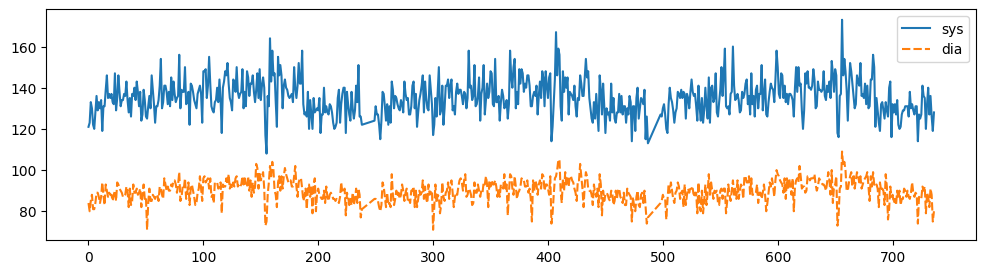

In [19]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.lineplot(data=df_daily[['sys', 'dia']], ax=ax)
plt.show();

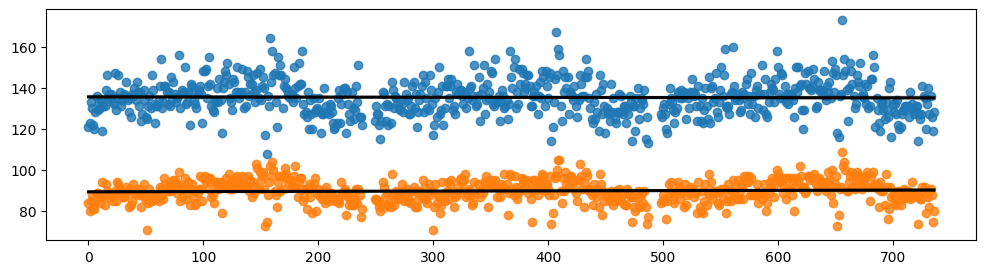

In [20]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.regplot(x=df_daily.index, y = 'sys', ax=ax, data=df_daily, line_kws={'color':'black'})
sns.regplot(x=df_daily.index, y = 'dia', ax=ax, data=df_daily, line_kws={'color':'black'})
ax.set(xlabel='', ylabel='')
plt.show(); 


# setting the dimensions of the plot
#
 
# drawing the plot
#sns.barplot(x, y, ax=ax)

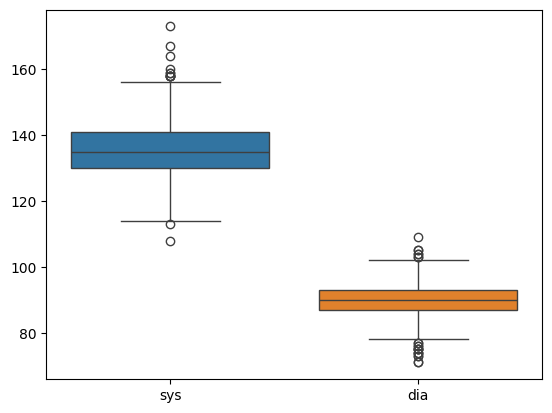

In [21]:
sns.boxplot(data=df_daily[['sys', 'dia']]);

In [27]:
df_summary = df_daily.drop('index', axis = 1)
df_summary = df_summary.groupby(['Date', 'DoW']).mean().round().astype(int).reset_index()
df_summary

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

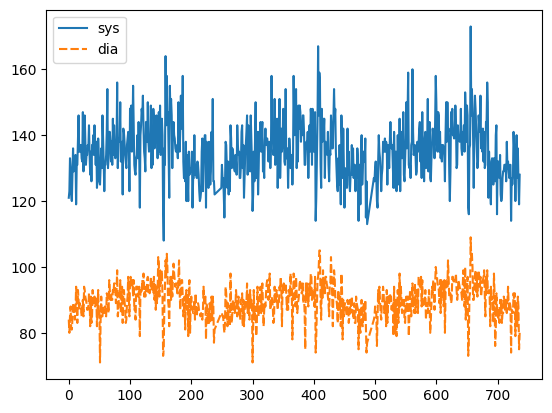

In [23]:
sns.lineplot(data=df_summary);

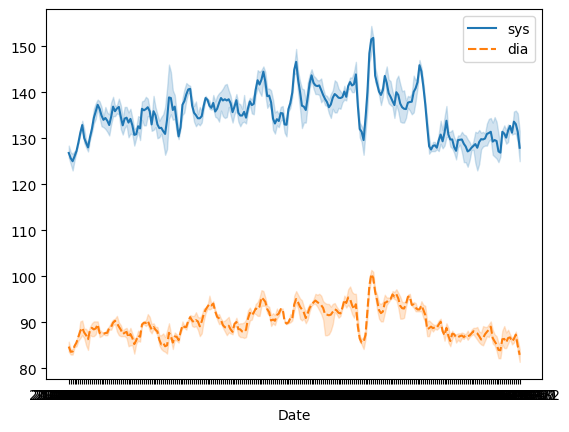

In [24]:
rolling = df_summary[['Date', 'sys', 'dia']].set_index('Date').rolling(window=5).mean().dropna()
sns.lineplot(data=rolling);

In [25]:
lst_date = pd.to_datetime(df_summary['Date'].max())
thirty_days_ago = lst_date - pd.to_timedelta(30, unit='d')
# lst_date, thirty_days_ago

df_summary['Date'] = pd.to_datetime(df_summary['Date'])
# df_summary.info()

thirty_day_df = df_summary[df_summary['Date'] > thirty_days_ago]

sixty_days_ago = lst_date - pd.to_timedelta(60, unit='d')
# prior_thirty_days = 
#df_summary[(df_summary['Date'] > sixty_days_ago) & (df_summary['Date'] < thirty_days_ago)]
df_summary[(df_summary['Date'] > sixty_days_ago) & (df_summary['Date'] <= thirty_days_ago)]


,Date,DoW,sys,dia
199,2023-10-24,Tuesday,130.0,89.0
200,2023-10-25,Wednesday,129.0,91.0
201,2023-10-26,Thursday,135.0,88.0
202,2023-10-27,Friday,118.0,87.0
203,2023-10-28,Saturday,127.0,86.0
...,...,...,...,...
720,2023-11-16,Thursday,131.0,89.0
721,2023-11-17,Friday,131.0,88.0
722,2023-11-18,Saturday,114.0,74.0
723,2023-11-19,Sunday,127.0,87.0


In [26]:
df_summary.head(2)

,Date,DoW,sys,dia
0,2023-04-08,Saturday,121.0,84.0
1,2023-04-09,Sunday,123.0,80.0
